In [49]:
import matplotlib.pyplot as plt

def plot_distribution_fixed_v2(df):
    # Filtra os dados para remover linhas onde t0, t1, t2, t3 são nulos ou NaN
    df_clean = df.dropna(subset=["t0", "t1", "t2", "t3"])

    # Filtra os dados para considerar apenas valores entre (-0.25, 0.25) para x e y
    df_filtered = df_clean[(df_clean["x"] >= -0.25) & (df_clean["x"] <= 0.25) &
                           (df_clean["y"] >= -0.25) & (df_clean["y"] <= 0.25)]

    # Função para calcular o número de erros e retornar a cor correspondente
    def get_color(row):
        errors = ((row[['t0', 't1', 't2', 't3']] < 0) | (row[['t0', 't1', 't2', 't3']] > 180)).sum()
        if errors == 0:
            return 'green'
        elif errors == 1:
            return 'yellow'
        elif errors == 2:
            return 'orange'
        elif errors == 3:
            return 'red'
        else:
            return 'darkred'

    # Aplica a função de classificação de cores
    df_filtered["color"] = df_filtered.apply(get_color, axis=1)

    # Plota os pontos no gráfico com limites fixos para x e y
    plt.figure(figsize=(8, 8))
    plt.scatter(df_filtered["x"], df_filtered["y"], c=df_filtered["color"], label="Pontos")
    plt.title("Distribuição de Pontos em Função de x e y")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim(-0.25, 0.25)
    plt.ylim(-0.25, 0.25)
    plt.grid(True)
    plt.show()


In [ ]:
l1 = 0.1 ; l2 =0.124 ; l3 = 0.06
z = 0.12
x_range = (0.05, 0.25)
y_range = (-0.12, 0.12)
step = 10

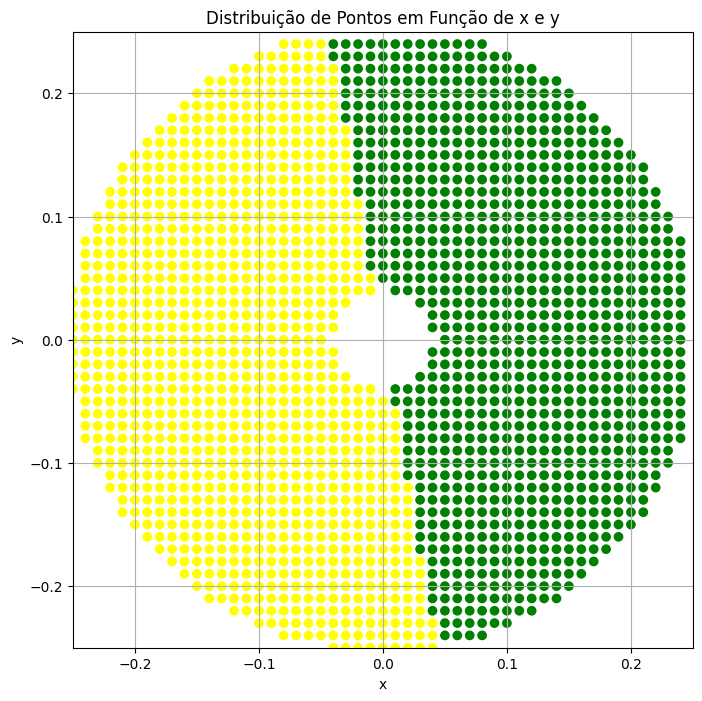

,x,y,t0,t1,t2,t3
0,-0.25,-0.25,NaN,NaN,NaN,NaN
1,-0.25,-0.24,NaN,NaN,NaN,NaN
2,-0.25,-0.23,NaN,NaN,NaN,NaN
3,-0.25,-0.22,NaN,NaN,NaN,NaN
4,-0.25,-0.21,NaN,NaN,NaN,NaN


In [66]:
from itertools import product
from utils.functions import mapping, ikine
import pandas as pd
import numpy as np

l1 = 0.1 ; l2 =0.124 ; l3 = 0.06
z = 0.12
x_range = (-0.25, 0.25)
y_range = (-0.25, 0.25)
step = 10

tested_positions = list(product(
    range(int(x_range[0]*1000), int(x_range[1]*1000), step),
    range(int(y_range[0]*1000), int(y_range[1]*1000), step)
))

def range_filter(values):
    x, y = values
    
    return (np.sqrt(x**2 + y**2) > 0.04)

# tested_positions = list(filter(range_filter, tested_positions))

tested_positions = list(filter(range_filter, map(lambda x : (x[0]/1000, x[1]/1000), tested_positions)))

data = []

for x, y in tested_positions:    
    try:
        t0, t1, t2, t3, _, _ = mapping(ikine([x, y, z], l1, l2, l3))
    except:
        t0, t1, t2, t3 = [None] * 4

    data.append([x, y, t0, t1, t2, t3])
    
df = pd.DataFrame(data, columns=["x", "y", "t0", "t1", "t2", "t3"])

plot_distribution_fixed_v2(df)

df.head()
    

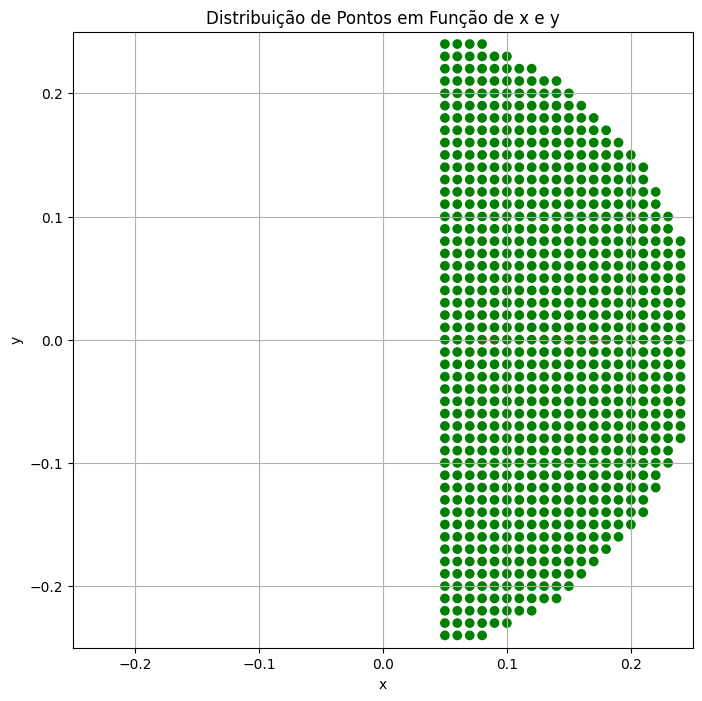

,x,y,t0,t1,t2,t3
0,0.05,-0.25,NaN,NaN,NaN,NaN
1,0.05,-0.24,1.768289,37.711826,81.025619,43.313793
2,0.05,-0.23,2.264774,46.589884,94.436318,47.846434
3,0.05,-0.22,2.804266,53.819983,104.613143,50.793160
4,0.05,-0.21,3.392498,60.276667,113.120225,52.843558


In [68]:
from itertools import product
from utils.functions import mapping, ikine
import pandas as pd
import numpy as np

l1 = 0.1 ; l2 =0.124 ; l3 = 0.06
z = 0.12
x_range = (0.05, 0.25)
y_range = (-0.25, 0.25)
step = 10

tested_positions = list(product(
    range(int(x_range[0]*1000), int(x_range[1]*1000), step),
    range(int(y_range[0]*1000), int(y_range[1]*1000), step)
))

def range_filter(values):
    x, y = values
    
    return (np.sqrt(x**2 + y**2) > 0.04)

# tested_positions = list(filter(range_filter, tested_positions))

tested_positions = list(filter(range_filter, map(lambda x : (x[0]/1000, x[1]/1000), tested_positions)))

data = []

for x, y in tested_positions:    
    try:
        t0, t1, t2, t3, _, _ = mapping(ikine([x, y, z], l1, l2, l3))
    except:
        t0, t1, t2, t3 = [None] * 4

    data.append([x, y, t0, t1, t2, t3])
    
df = pd.DataFrame(data, columns=["x", "y", "t0", "t1", "t2", "t3"])

plot_distribution_fixed_v2(df)

df.head()
    